In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import tukey_hsd

In [2]:
# Load data
data = pd.read_csv('all_data.csv')

In [3]:
# Exploring the data
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# Taking a first look at the data reveals that there are 4 columns: Country, Year, Life expectancy at birth, and GDP.
# Next, we will check if there are any missing values in the data
for column in data.columns:
    print(data[column].unique())
pd.isnull(data).sum()

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
[77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
[7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.10995000e+12 6.10062000e+12 7.57255000e+12
 8.56055000e+12 9.60722000e+12 1.04824000e+13 1.10647000e+13
 1.

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [5]:
# We see that there are no null values or any other strange values that could represent null values (e.g. '.' or '0')
# We can check the data types before performing any calculations
data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [6]:
# We can also gain some initial statistics on the data
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


         Life expectancy at birth (years)                  GDP              
                                     mean median          mean        median
Country                                                                     
Chile                            78.94375  79.00  1.697888e+11  1.729975e+11
China                            74.26250  74.45  4.957714e+12  4.075195e+12
Germany                          79.65625  79.85  3.094776e+12  3.396350e+12
Mexico                           75.71875  75.65  9.766506e+11  1.004376e+12
USA                              78.06250  78.15  1.407500e+13  1.445000e+13
Zimbabwe                         50.09375  47.40  9.062580e+09  6.733671e+09


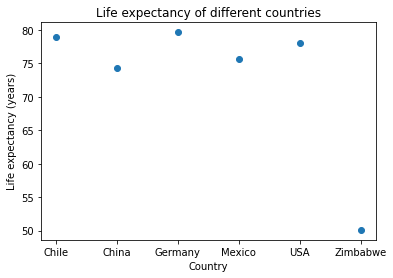

In [7]:
# We can now start asking questions that we want answered. The first question is 'What is the average life expectancy for the six nations?'
grouped = data.groupby('Country')[['Life expectancy at birth (years)','GDP']].agg([np.mean,np.median])
grouped.rename(index={'United States of America':'USA'},inplace=True)
print(grouped)
plt.plot(grouped.index,grouped['Life expectancy at birth (years)']['mean'],'o')
plt.xlabel('Country')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy of different countries')
plt.show()

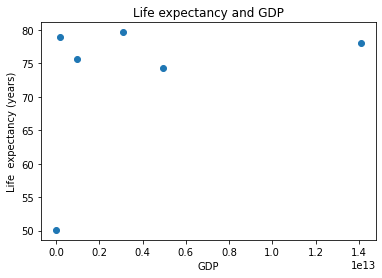

In [8]:
# It appears from the table and graph that Germany has the highest life expectancy and Zimbabwe has the lowest.
# The next question we can ask is if there is a correlation between average life expectancy and average GDP
grouped_sorted = grouped.sort_values(('GDP','mean'))
plt.plot(grouped_sorted['GDP']['mean'],grouped_sorted['Life expectancy at birth (years)']['mean'],'o')
plt.xlabel('GDP')
plt.ylabel('Life  expectancy (years)')
plt.title('Life expectancy and GDP')
plt.show()

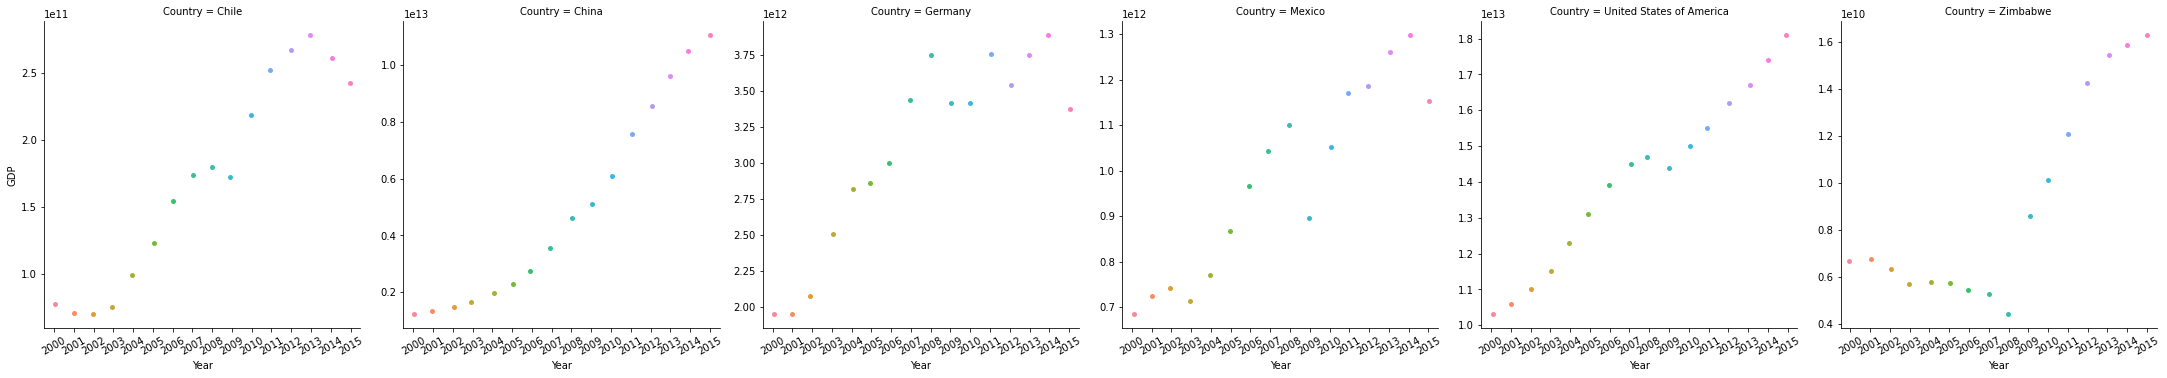

In [9]:
# It appears that as GDP increases, life expectancy has increasesd as well. However, this correlation is not too strong since
# there are some fluctuations.
# We can take a closer look at how GDP changes for each country
sns.catplot(data=data,x='Year',y='GDP',col='Country',sharey=False).set_xticklabels(rotation=30)
plt.show()

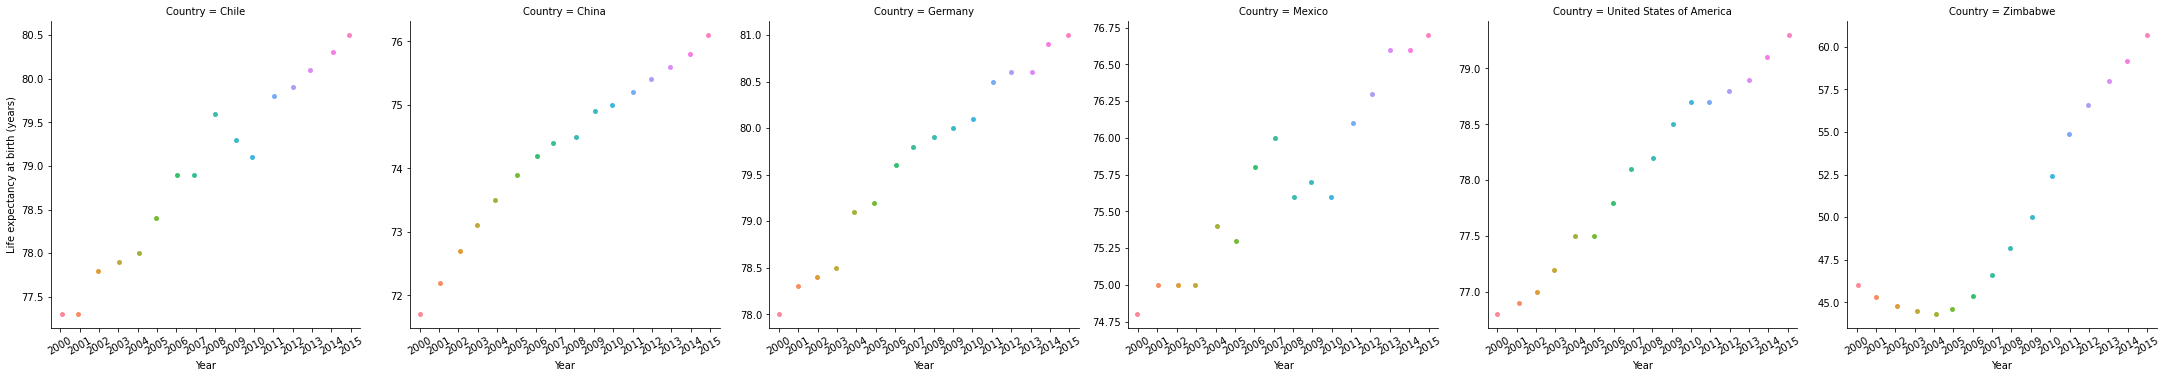

In [10]:
# It appears that for the six countries, GDP generally increases over the years.
# We can also see how life expectancy changes over the years
sns.catplot(data=data,x='Year',y='Life expectancy at birth (years)',col='Country',sharey=False).set_xticklabels(rotation=30)
plt.show()

In [11]:
# Life GDP, life expectancy also generally increases as the years increase
# The last question we can ask is if there is a statistically significant difference between life expectancy
# between the six countries.
countries = data['Country'].unique()
life_expectancies = {}
for country in countries:
    life_expectancies[country] = data[data.Country == country]['Life expectancy at birth (years)']
life_expectancies

{'Chile': 0     77.3
 1     77.3
 2     77.8
 3     77.9
 4     78.0
 5     78.4
 6     78.9
 7     78.9
 8     79.6
 9     79.3
 10    79.1
 11    79.8
 12    79.9
 13    80.1
 14    80.3
 15    80.5
 Name: Life expectancy at birth (years), dtype: float64,
 'China': 16    71.7
 17    72.2
 18    72.7
 19    73.1
 20    73.5
 21    73.9
 22    74.2
 23    74.4
 24    74.5
 25    74.9
 26    75.0
 27    75.2
 28    75.4
 29    75.6
 30    75.8
 31    76.1
 Name: Life expectancy at birth (years), dtype: float64,
 'Germany': 32    78.0
 33    78.3
 34    78.4
 35    78.5
 36    79.1
 37    79.2
 38    79.6
 39    79.8
 40    79.9
 41    80.0
 42    80.1
 43    80.5
 44    80.6
 45    80.6
 46    80.9
 47    81.0
 Name: Life expectancy at birth (years), dtype: float64,
 'Mexico': 48    74.8
 49    75.0
 50    75.0
 51    75.0
 52    75.4
 53    75.3
 54    75.8
 55    76.0
 56    75.6
 57    75.7
 58    75.6
 59    76.1
 60    76.3
 61    76.6
 62    76.6
 63    76.7
 Name: Life expectancy

In [12]:
# To calculuate statistiacl significance, we can use ANOVA. We have to meet the criteria. We can assume that the samples are
# independent and from a normally distributed population. We can check the last condition of equal standard deviations.
for country in life_expectancies.keys():
    print(country +': '+str(np.std(life_expectancies[country])))


Chile: 1.0252857833306763
China: 1.2761636846423725
Germany: 0.9440396906380575
Mexico: 0.6012681909930035
United States of America: 0.8061288668693107
Zimbabwe: 5.751681140110255


In [13]:
# It appears that the standard deviation for Zimbabwe is much larger than the other countries. Thus, it would be inappropriate
# to use ANOVA in this situation. We can use the Kruskal-Wallis-H-test to determine if there are statistically signficant
# differences in life expectancies between the six countries.
x = [[1,2,3],[4,5,6]]
y = [4,5,3]
life_expectancy_list = []
for country in life_expectancies.keys():
    life_expectancy_list.append(life_expectancies[country])
kruskal(*life_expectancy_list)

KruskalResult(statistic=84.1917762042062, pvalue=1.111968964300463e-16)

In [17]:
# We got a really small p-value. Thus, we can reject the null hypothesis and conclude that there is a significant difference
# between at least two groups. To find out which group life expectancies are statistically different, we can use a post-hoc
# test such as Tukey's HSD test.
results = tukey_hsd(*life_expectancy_list)
print(results)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.681     0.000     2.017     7.345
 (0 - 2)     -0.713     0.970    -3.377     1.952
 (0 - 3)      3.225     0.008     0.561     5.889
 (0 - 4)      0.881     0.928    -1.783     3.545
 (0 - 5)     28.850     0.000    26.186    31.514
 (1 - 0)     -4.681     0.000    -7.345    -2.017
 (1 - 2)     -5.394     0.000    -8.058    -2.730
 (1 - 3)     -1.456     0.606    -4.120     1.208
 (1 - 4)     -3.800     0.001    -6.464    -1.136
 (1 - 5)     24.169     0.000    21.505    26.833
 (2 - 0)      0.713     0.970    -1.952     3.377
 (2 - 1)      5.394     0.000     2.730     8.058
 (2 - 3)      3.938     0.001     1.273     6.602
 (2 - 4)      1.594     0.508    -1.070     4.258
 (2 - 5)     29.562     0.000    26.898    32.227
 (3 - 0)     -3.225     0.008    -5.889    -0.561
 (3 - 1)      1.456     0.606    -1.208     4.120
 (3 - 2)     -3.938     0.001   

In [ ]:
# In the table above: 0 = 'Chile', 1 = 'China', 2 = 'Germany', 3 = 'Mexico', 4 = 'United States of America', 5 = 'Zimbabwe'
# We reject the null hypothesis if the p-value is less than 0.05. We can reject the null hypothesis in several cases and 
# conclude that several of the countries have statistically significant differences in life expectancy.